In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
# Loading File, and looking at basic data overview
data = pd.read_csv('Basic_Stats.csv')

print("Initial Data Overview:")
print(data.info())
print(data.head())

Initial Data Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17172 entries, 0 to 17171
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   13504 non-null  float64
 1   Birth Place           14794 non-null  object 
 2   Birthday              16835 non-null  object 
 3   College               17133 non-null  object 
 4   Current Status        17172 non-null  object 
 5   Current Team          3096 non-null   object 
 6   Experience            17133 non-null  object 
 7   Height (inches)       17026 non-null  float64
 8   High School           2514 non-null   object 
 9   High School Location  2510 non-null   object 
 10  Name                  17172 non-null  object 
 11  Number                1708 non-null   float64
 12  Player Id             17172 non-null  object 
 13  Position              3096 non-null   object 
 14  Weight (lbs)          17121 non-null  float64
 

In [35]:
#Cleaning Data, dropping position if NA or giving the median values for the other, numerical variables
cleaned_data = data[['Age', 'Height (inches)', 'Weight (lbs)', 'Position']].copy()
cleaned_data = cleaned_data.dropna(subset=['Position'])
cleaned_data['Age'] = cleaned_data['Age'].fillna(cleaned_data['Age'].median())
cleaned_data['Height (inches)'] = cleaned_data['Height (inches)'].fillna(cleaned_data['Height (inches)'].median())
cleaned_data['Weight (lbs)'] = cleaned_data['Weight (lbs)'].fillna(cleaned_data['Weight (lbs)'].median())

In [36]:
#Printing Cleaned Data information
print("\nCleaned Data Overview:")
print(cleaned_data.info())
print(cleaned_data.head())


Cleaned Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3096 entries, 4 to 17157
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              3096 non-null   float64
 1   Height (inches)  3096 non-null   float64
 2   Weight (lbs)     3096 non-null   float64
 3   Position         3096 non-null   object 
dtypes: float64(3), object(1)
memory usage: 120.9+ KB
None
     Age  Height (inches)  Weight (lbs) Position
4   25.0             77.0         305.0       DE
7   22.0             77.0         250.0       TE
17  25.0             74.0         220.0       TE
35  29.0             71.0         200.0       SS
37  26.0             72.0         205.0       SS


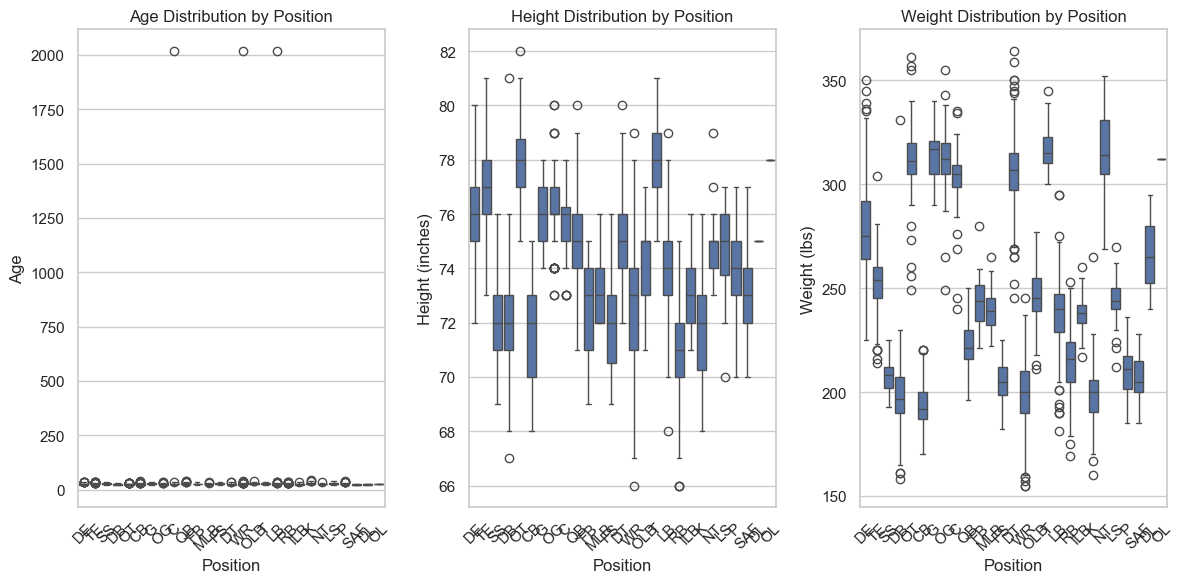

In [37]:
#Plotting information about each Explanatory variable
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='Position', y='Age', data=cleaned_data)
plt.title('Age Distribution by Position')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.boxplot(x='Position', y='Height (inches)', data=cleaned_data)
plt.title('Height Distribution by Position')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.boxplot(x='Position', y='Weight (lbs)', data=cleaned_data)
plt.title('Weight Distribution by Position')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

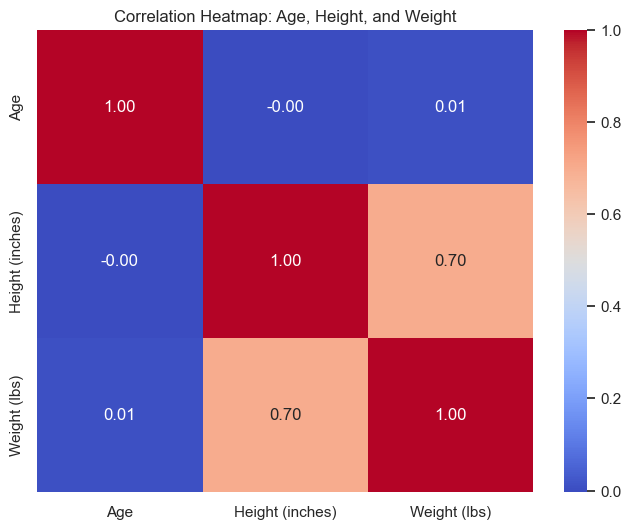

In [38]:
#Plotting a correlation matrix, showing how once variable is related to the other
correlation_matrix = cleaned_data[['Age', 'Height (inches)', 'Weight (lbs)']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap: Age, Height, and Weight')
plt.show()

In [39]:
#A summary of each position explanatory variable stats
position_summary = cleaned_data.groupby('Position').describe()
print("\nSummary Statistics by Position:")
print(position_summary)


Summary Statistics by Position:
            Age                                                          \
          count       mean         std   min   25%   50%    75%     max   
Position                                                                  
C          92.0  47.576087  207.605354  21.0  24.0  25.0  28.00  2017.0   
CB        225.0  24.924444    2.856474  20.0  23.0  24.0  26.00    38.0   
DB        222.0  24.981982    2.449423  20.0  23.0  25.0  26.75    32.0   
DE        249.0  25.726908    3.253676  20.0  23.0  25.0  27.00    37.0   
DL          3.0  23.666667    0.577350  23.0  23.5  24.0  24.00    24.0   
DT        173.0  25.086705    2.911185  20.0  23.0  24.0  27.00    36.0   
FB         28.0  26.392857    3.212698  22.0  24.0  25.0  28.00    34.0   
FS         59.0  26.779661    2.959892  22.0  25.0  26.0  29.00    33.0   
G          45.0  27.422222    2.667045  23.0  25.0  27.0  29.00    35.0   
ILB        55.0  25.090909    2.920380  21.0  23.0  24.0  27.00    

In [40]:
#Loading some necessary libraries for ML
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [41]:
#To convert the categorical Position to and numerical value, must use label encoder for better ML use
label_encoder = LabelEncoder()
cleaned_data['Position_encoded'] = label_encoder.fit_transform(cleaned_data['Position'])
X = cleaned_data[['Age', 'Height (inches)', 'Weight (lbs)']]  # Features
y = cleaned_data['Position_encoded']

In [42]:
#Splitting Data to an 80,20 split, setting the random state at 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
#Use Random Forest Calissifier to train model and for classification
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
#Use for accuracy and evaluation to judge how good the model was
y_pred = rf_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 33.23%


In [45]:
#Shows perfermance metrics like precision, recall, and F1-score for each class (position)
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, labels=np.unique(y_test)))
conf_matrix = confusion_matrix(y_test, y_pred)



Classification Report:
              precision    recall  f1-score   support

           C       0.18      0.16      0.17        19
          CB       0.27      0.33      0.29        43
          DB       0.26      0.20      0.22        46
          DE       0.40      0.42      0.41        52
          DL       0.00      0.00      0.00         1
          DT       0.46      0.44      0.45        36
          FB       0.33      0.20      0.25         5
          FS       0.00      0.00      0.00        11
           G       0.00      0.00      0.00         7
         ILB       0.18      0.22      0.20         9
           K       0.14      0.14      0.14         7
          LB       0.26      0.29      0.27        35
          LS       0.00      0.00      0.00        10
         MLB       0.00      0.00      0.00         6
          NT       0.00      0.00      0.00         7
          OG       0.34      0.29      0.31        35
          OL       0.19      0.27      0.23        22
   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:2628: UserWarning: labels size, 26, does not match size of target_names, 27
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-package

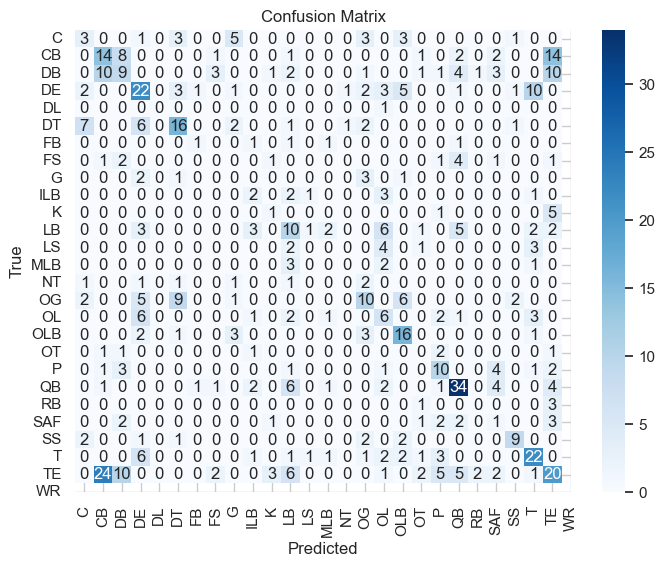

In [46]:
##The confusion matrix shows how many correct and incorrect predictions the model made for each class
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()